## Data Visualization

Install libraries if not already installed, then import the appropriate libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

In [3]:
# Connect to created database
conn = duckdb.connect('/Users/nmoraes/Documents/MEDS/Spring2025/EDS213/discussion/IAC_SQL_Exploration/iac.db')

### Create and Store Queries

In [17]:
rec_query = """
SELECT 
    a.state,
    COUNT(*) AS total_recommendations
FROM rec r
INNER JOIN assess a ON r.id = a.id
WHERE a.state IS NOT NULL
GROUP BY a.state
ORDER BY total_recommendations DESC
LIMIT 10;
"""

In [18]:
state_query = """
WITH state_counts AS (
    SELECT
        a.state,
        COUNT(CASE WHEN r.impstatus = 'I' THEN 1 END) AS implemented,
        COUNT(CASE WHEN r.impstatus IN ('I', 'N') THEN 1 END) AS total_relevant,
        COUNT(*) AS total_recommendations
    FROM rec r
    INNER JOIN assess a ON r.id = a.id
    WHERE a.state IS NOT NULL
    GROUP BY a.state
)
SELECT
    state,
    implemented,
    total_relevant,
    total_recommendations,
    ROUND((implemented * 100.0 / NULLIF(total_relevant, 0)), 2) AS impl_percentage
FROM state_counts
ORDER BY impl_percentage DESC
LIMIT 10;
"""

In [19]:
sic_query = """
WITH sic_counts AS (
    SELECT
        CAST(sic AS INTEGER)::VARCHAR AS sic_int,
        COUNT(*) AS assessment_count
    FROM assess
    WHERE sic IS NOT NULL
    GROUP BY sic_int
),
unique_descriptions AS (
    SELECT DISTINCT
        sic,
        sic_description
    FROM crosswalk
)
SELECT DISTINCT
    c.sic_int AS sic_code,
    u.sic_description,
    c.assessment_count
FROM sic_counts c
LEFT JOIN unique_descriptions u ON c.sic_int = u.sic
ORDER BY c.assessment_count DESC
LIMIT 10;
"""

In [20]:
# Create df from queries
state_df = conn.execute(state_query).fetchdf()
sic_df = conn.execute(sic_query).fetchdf()
rec_df = conn.execute(rec_query).fetchdf()

## Create Plots

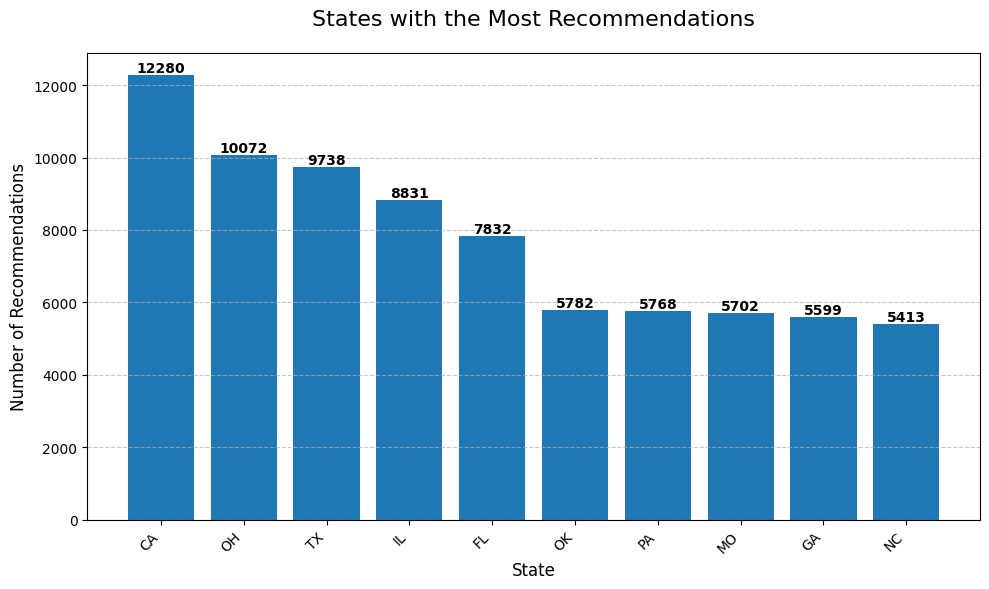

: 

In [ ]:
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(rec_df['state'], rec_df['total_recommendations'])

# Add value labels on top of bars
plt.bar_label(bars, fontsize=10, fontweight='bold')

# Add labels and title
plt.title('States with the Most Recommendations', fontsize=16, pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Recommendations', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()
plt.show()

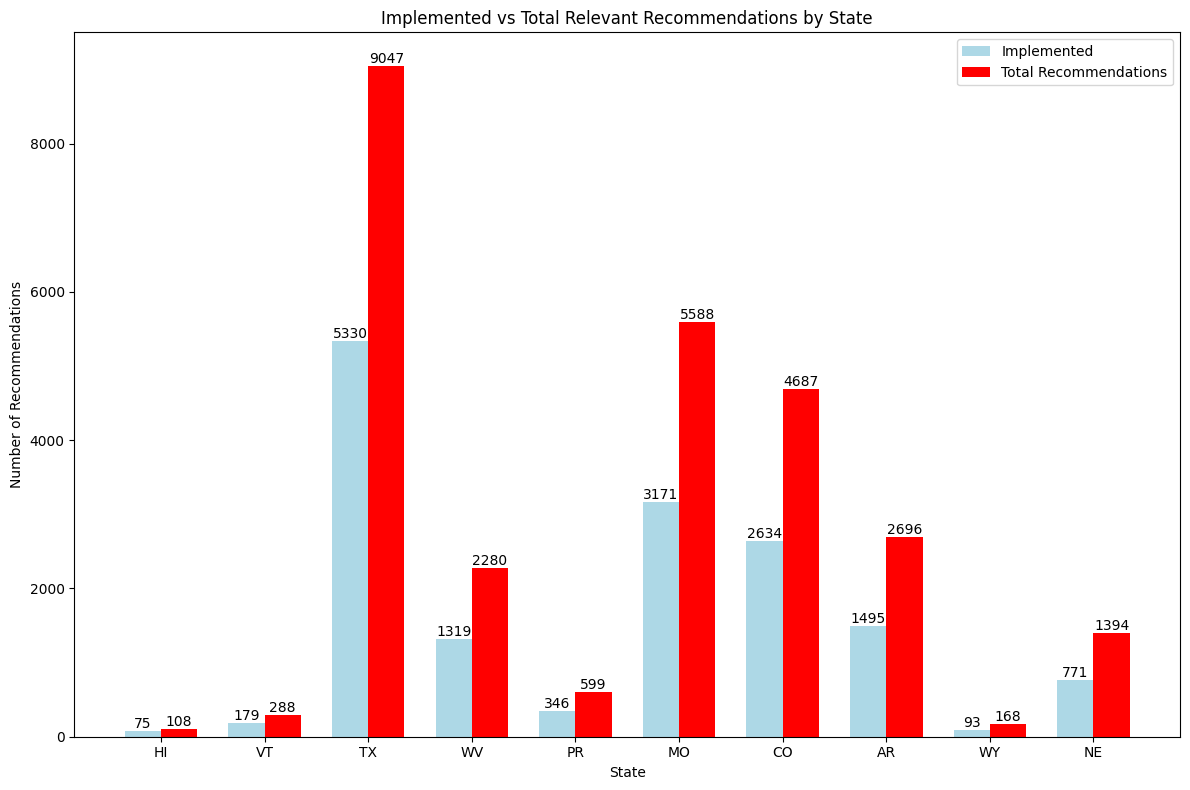

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

x = range(len(state_df))
width = 0.35

# Create bars
bars1 = ax.bar([i - width/2 for i in x], state_df['implemented'], width, label ='Implemented', color='lightblue')
bars2 = ax.bar([i + width/2 for i in x], state_df['total_relevant'], width, label = 'Total Recommendations', color='red')

ax.set_xlabel('State')
ax.set_ylabel('Number of Recommendations')
ax.set_title('Implemented vs Total Relevant Recommendations by State')
ax.set_xticks(x)
ax.set_xticklabels(state_df['state']
)
ax.legend()

# Bar value labels
ax.bar_label(bars1)
ax.bar_label(bars2)

plt.tight_layout()
plt.show()

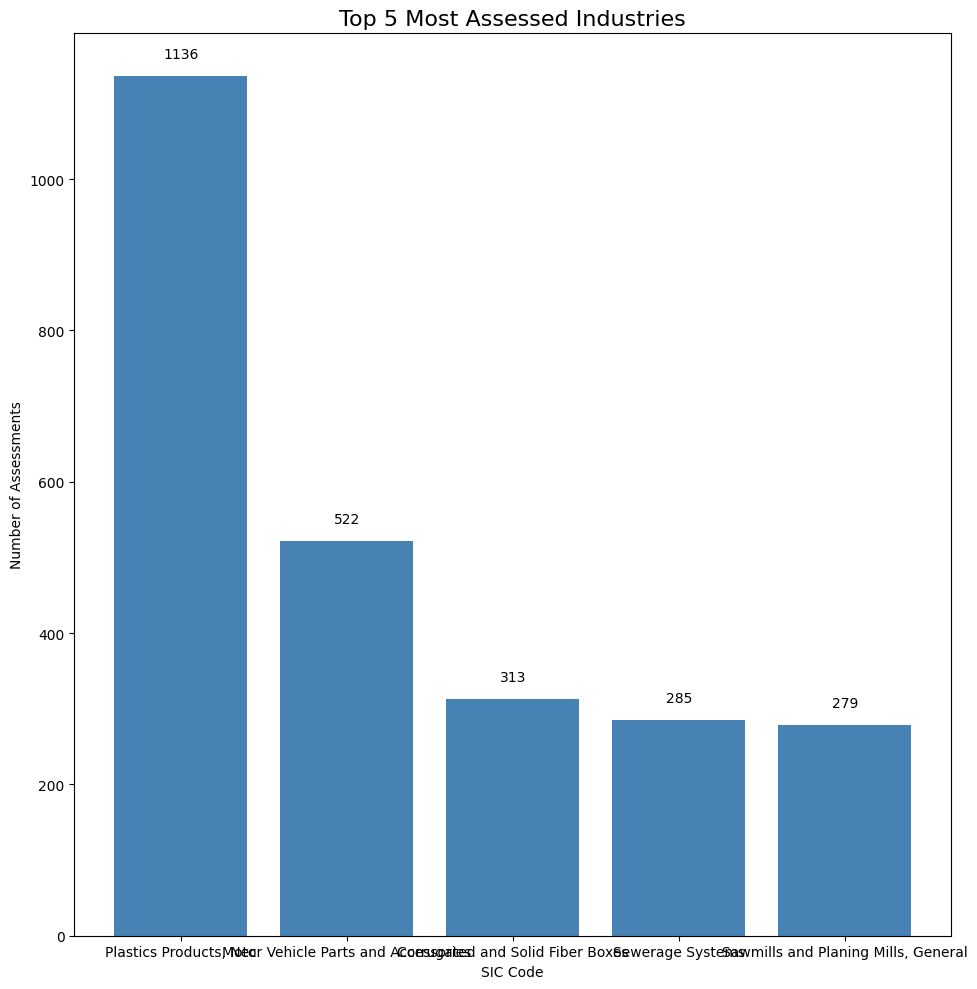

In [8]:
plt.figure(figsize=(10, 10))

plt.bar(sic_df['sic_description'][:5], sic_df['assessment_count'][:5], color='steelblue')

# Title and labels
plt.title('Top 5 Most Assessed Industries', fontsize = 16)
plt.xlabel('SIC Code')
plt.ylabel('Number of Assessments')

# Add value labels on top of bars
for i, v in enumerate(sic_df['assessment_count'][:5]):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()